In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
client_id='ToyuMeXdpleHcISCzTNuqdeE'
client_secret='06rcPUl06zc0a4qXDGDeSYHozGfG6dxX-2XH8mPSZf6alta5ZkZqgzCYYgGi9LESR2OKl+axCOZb+3Rz_gAicH9ZQeyYbj_Qr6kqkr51W4DJl6Y+sjLmKhUSzG88PO5T'

In [22]:
import cassandra
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
         'secure_connect_bundle': r"C:\Users\Lenovo\Downloads\secure-connect-internship (1).zip"
}
auth_provider = PlainTextAuthProvider(client_id, client_secret)
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

row = session.execute("select release_version from system.local").one()
if row:
      print(row[0])
else:
      print("An error occurred.")

4.0.0.6816


In [23]:
df = pd.DataFrame(list(session.execute("select * from credit_card.my_table;")))

In [24]:
df.sample(5)

,ID,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,LIMIT_BAL,...,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,default_payment_next_month
15815,13278,32,994,10168,-4,5515,3673,6106,1,150000,...,2,-1,10290,0,5519,3,6134,3779,1,0
20901,6364,27,11379,9559,10861,10055,11040,10466,1,120000,...,0,0,1200,1500,0,1100,550,600,2,1
5603,3491,45,1473,1473,24770,3366,1473,44314,1,80000,...,-1,-1,1473,24770,3366,1473,44314,4000,1,1
14804,15813,28,2750,-650,-975,-1625,2561,4187,1,120000,...,-1,0,0,0,0,4186,2000,1000,2,0
8293,28178,31,0,0,0,0,0,0,1,200000,...,-2,-2,0,0,0,0,0,0,2,0


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0


In [10]:
#reading first five rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
#reading last five rows
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [12]:
#Getting information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [13]:
#checking for null values

df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [14]:
#checking for shape
df.shape

(30000, 25)

In [15]:
#duplicated values
df.duplicated().sum()

0

<AxesSubplot:>

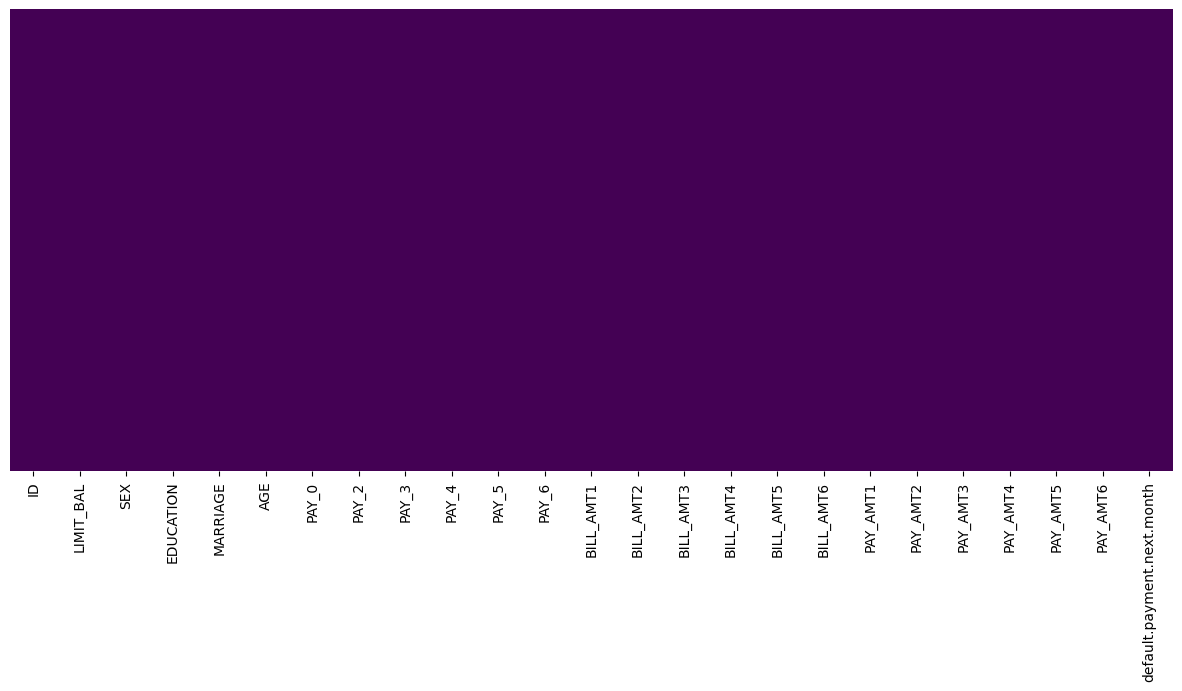

In [16]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

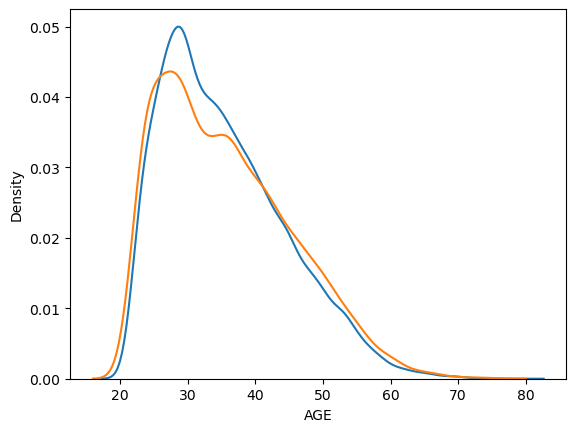

In [19]:
sns.distplot(df[df['default.payment.next.month']==0]['AGE'],hist=False)
sns.distplot(df[df['default.payment.next.month']==1]['AGE'],hist=False)

In [20]:
from sklearn.model_selection import train_test_split  

In [26]:
X=df.drop('default_payment_next_month',axis=1)

In [27]:
y=df.default_payment_next_month

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [31]:
scaler=StandardScaler()

In [32]:
scaler.fit(X_train)

StandardScaler()

In [33]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [35]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.640022,-1.141116,-0.414023,-0.407516,-0.401445,-0.369793,-0.375501,-0.376250,0.178024,-1.132741,...,0.186277,0.234162,0.254850,-0.336745,-0.306323,-0.259332,-0.254116,-0.299976,-0.294277,-1.229496
1,1.284212,-0.923357,-0.310027,-0.301989,-0.265792,-0.206417,-0.163567,-0.090261,-1.084557,-0.593729,...,0.186277,0.234162,0.254850,-0.336745,-0.210337,-0.176691,-0.223846,-0.076767,-0.294277,0.813341
2,-0.292537,0.165440,-0.696194,-0.690728,-0.687005,-0.673499,-0.663548,-0.651768,1.440604,1.562318,...,-1.517105,-1.524568,-1.478263,-0.336745,-0.306323,-0.286878,-0.298740,-0.322201,-0.294277,0.813341
3,0.531909,-0.596718,-0.498935,-0.473134,-0.445924,-0.414988,-0.389950,-0.380100,0.178024,-0.978738,...,1.889659,1.992893,1.987964,-0.248066,-0.226335,-0.248313,-0.261293,-0.322201,-0.203285,0.813341
4,1.502607,-0.814477,-0.608668,-0.541513,-0.535857,-0.496974,-0.473977,-0.297567,-1.084557,-0.824734,...,0.186277,0.234162,0.254850,-0.083833,-0.306323,-0.205174,-0.256737,0.359560,0.362004,0.813341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,1.003500,0.600959,-0.646359,-0.675241,-0.547482,-0.591779,-0.421521,-0.454629,-1.084557,1.100308,...,-0.665414,-0.645203,0.254850,-0.336745,0.197759,-0.000060,0.611778,-0.322201,0.647663,0.813341
20996,1.592902,0.165440,-0.693620,-0.688067,-0.684213,-0.670482,-0.660429,-0.651768,0.178024,0.715300,...,-0.665414,-0.645203,-0.611707,-0.325630,-0.296244,-0.276300,-0.287006,-0.322201,-0.264363,0.813341
20997,0.249695,-0.923357,-0.620072,-0.690728,-0.687005,-0.673499,-0.663548,-0.651768,0.178024,-0.131719,...,-1.517105,-1.524568,-1.478263,-0.336745,-0.306323,-0.286878,-0.298740,-0.322201,-0.294277,0.813341
20998,0.848924,-0.923357,0.021568,-0.052144,-0.032451,-0.126504,-0.066236,-0.213074,-1.084557,-0.439726,...,0.186277,0.234162,0.254850,-0.231985,-0.205005,-0.186883,-0.173917,-0.219937,-0.180537,0.813341


In [37]:
minmax=MinMaxScaler()

In [50]:
minmax.fit(X_train)

MinMaxScaler()

In [51]:
X_min=minmax.transform(X_train)

In [39]:
X_min_test=minmax.transform(X_test)

In [40]:
robust=RobustScaler()

In [41]:
X_robust=robust.fit_transform(X_train)

In [42]:
X_robust_test=robust.transform(X_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn=KNeighborsClassifier()

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
knn.score(X_test,y_test)

0.7433333333333333

In [47]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [48]:
knn.score(X_test_scaled,y_test)

0.7934444444444444

In [55]:
from imblearn.over_sampling import  SMOTE

In [56]:
smt=SMOTE()

In [57]:
X_train_sm,y_train_sm=smt.fit_resample(X_train_scaled,y_train)

In [58]:
knn.fit(X_train_sm,y_train_sm)

KNeighborsClassifier()

In [59]:
knn.score(X_test_scaled,y_test)

0.6646666666666666